
# Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

In this project, I will analyze the TMDb movie dataset and then communicate my findings about it, this data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue, budget, director, release date, runtime and more patterns, I will use the Python libraries NumPy, pandas, Matplotlib and Seaborn to make my analysis easier.

I will go through the data analysis process and see how everything fits together.


##  Questions ...?

***1)Top 20 Rated Movies?*** <br>

***2)What Kinds of properties are associated with Top 20 Rated Movies?*** <br>

***3)Top 20 Profitable Movies?*** <br>

***4)What Kinds of properties are associated with Top 20 Profitable Movies?*** <br>

***5)Top 10 Directors by Number of Released Movies?*** <br>

***6)What is The Distribution of Runtime?*** <br>

***7)What is The Correlations Between Movies Properties?*** <br>

***8)How Movies Profit changed over Years?*** <br>

***9)What is The Average Genre Profit?*** <br>

***10)What is The Distribution of  Genre Profit?*** <br>

***11)How average Genre Profit changed over Years?***

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
# Import Important Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.25)

In [2]:
# load the TMDb movie dataset 'tmdb-movies.csv' to 'movie_df' dataframe
movie_df =pd.read_csv('tmdb-movies.csv')
# see first 5 rows from the data
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**1) There are unique id value for each row.** <br>
**2) There are no currency unit for budget or revenue, So I will consider that budget and revenue are in dollar currency.** <br>
**3) 'cast' and 'genres' columns contain multiple values separated by pipe (|) characters.**


In [3]:
# print number of rows and columns
print("There are {} Rows and {} Columns in our Data".format(movie_df.shape[0], movie_df.shape[1]))

There are 10866 Rows and 21 Columns in our Data


In [4]:
# print columns names
print(movie_df.columns.values)

['id' 'imdb_id' 'popularity' 'budget' 'revenue' 'original_title' 'cast'
 'homepage' 'director' 'tagline' 'keywords' 'overview' 'runtime' 'genres'
 'production_companies' 'release_date' 'vote_count' 'vote_average'
 'release_year' 'budget_adj' 'revenue_adj']


In [5]:
# print summary information about data 
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

***There are many null values in some columns like 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',  'genres' and 'production_companies'.***

In [6]:
# Calculating the descriptive statistics for each numeric column
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* ***'id' column must be categorical column.***

## Data Cleaning

###  Remove Duplicated Rows:

In [7]:
# check duplicated rows
print('There are {} Duplicated Rows'.format(movie_df.duplicated().sum()))

There are 1 Duplicated Rows


In [8]:
# remove duplicated rows
movie_df.drop_duplicates(inplace=True)
print("After removing duplicated rows the number of rows become {} ".format(movie_df.shape[0]))

After removing duplicated rows the number of rows become 10865 


###  Remove Unused Columns:

* ***I will remove unused columns like 'imdb_id',  'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count',  'budget_adj' and 'revenue_adj' columns from data.***

In [9]:
movie_df.drop(columns=['imdb_id',  'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj'], inplace=True)
print("After Removing Unused Columns There are {} Columns,".format(movie_df.shape[1]))
print('and their Names are')
print(movie_df.columns.values)

After Removing Unused Columns There are 11 Columns,
and their Names are
['id' 'popularity' 'budget' 'revenue' 'original_title' 'director'
 'runtime' 'genres' 'release_date' 'vote_average' 'release_year']


### Remove Null Values:

In [10]:
# check count of null values
movie_df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64

**1) 'director' column have 44 null values.** <br>
**2) 'genres' column have 23 null values.**

In [11]:
# remove null values
movie_df.dropna(inplace=True)

In [12]:
# check count of null values
movie_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
dtype: int64

In [13]:
# print number of rows and columns
print("There are {} Rows and {} Columns After Removing Null Values".format(movie_df.shape[0], movie_df.shape[1]))

There are 10800 Rows and 11 Columns After Removing Null Values


### Fix Zero Values in Budget, Revenue and Runtime:

In [14]:
# check zero values in 'budget', 'revenue' and 'runtime' columns.
movie_df[['budget', 'revenue', 'runtime']].apply(lambda x: np.sum(x==0))

budget     5636
revenue    5952
runtime      28
dtype: int64

**1) 'budget' column has 5636 zero values.** <br>
**2) 'revenue' column has 5952 zero values.** <br>
**3) 'runtime' column has 28 zero values.**

In [15]:
# replace zero values with the mean of each column
movie_df[['budget', 'revenue', 'runtime']] = movie_df[['budget', 'revenue', 'runtime']].apply(lambda x: x.replace(0, x.mean()))

In [16]:
# check zero values
movie_df[['budget', 'revenue', 'runtime']].apply(lambda x: np.sum(x==0))

budget     0
revenue    0
runtime    0
dtype: int64

### Fix Columns Datatypes:

In [17]:
# check columns datatypes.
movie_df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
director           object
runtime           float64
genres             object
release_date       object
vote_average      float64
release_year        int64
dtype: object

**1) I will convert 'id' column from integer to string.**  <br>
**2) I will convert 'release_date' column from object to datetime.**

In [18]:
# convert 'id' column datatype to string format
movie_df['id'] = movie_df['id'].astype('string')

In [19]:
# convert 'release_date' column datatype to datetime format
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [20]:
# check columns datatypes.
movie_df.dtypes

id                        string
popularity               float64
budget                   float64
revenue                  float64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

### Add New Column:

In [21]:
# add 'profit' column
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

### Rename Columns:

In [22]:
# rename 'genres' to 'genre', 'original_title' to 'title', 'vote_average' to 'rating', 'release_year' to 'year'
movie_df.rename(columns={'genres':'genre', 'original_title':'title', 'vote_average':'rating', 'release_year':'year'}, inplace=True)
print("Current Names are {}".format(movie_df.columns.values))

Current Names are ['id' 'popularity' 'budget' 'revenue' 'title' 'director' 'runtime' 'genre'
 'release_date' 'rating' 'year' 'profit']


### Rearrange Columns:

In [23]:
# rearrange columns positions
movie_df = movie_df[['id', 'title', 'director', 'genre', 'runtime', 'budget', 'revenue', 'profit', 'rating',  'popularity', 'release_date', 'year']]
print("Current Order is {}".format(movie_df.columns.values))

Current Order is ['id' 'title' 'director' 'genre' 'runtime' 'budget' 'revenue' 'profit'
 'rating' 'popularity' 'release_date' 'year']


### Check Cleaned Data:

In [24]:
# check our data 
movie_df.head()

,id,title,director,genre,runtime,budget,revenue,profit,rating,popularity,release_date,year
0,135397,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,124.0,150000000.0,1.513529e+09,1.363529e+09,6.5,32.985763,2015-06-09,2015
1,76341,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,120.0,150000000.0,3.784364e+08,2.284364e+08,7.1,28.419936,2015-05-13,2015
2,262500,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,119.0,110000000.0,2.952382e+08,1.852382e+08,6.3,13.112507,2015-03-18,2015
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,136.0,200000000.0,2.068178e+09,1.868178e+09,7.5,11.173104,2015-12-15,2015
4,168259,Furious 7,James Wan,Action|Crime|Thriller,137.0,190000000.0,1.506249e+09,1.316249e+09,7.3,9.335014,2015-04-01,2015


### Save Cleaned Data:

In [25]:
# save our cleaned data as 'cleaned_movie_data.csv'
movie_df.to_csv('cleaned_movie_data.csv', index=False)

## <a id='eda'></a>
## Exploratory Data Analysis


### 1) Top 20 Rated Movies?

In [26]:
# sort data descending by 'rating' column and slicing first 20 movies
top20_rating = movie_df.sort_values('rating', ascending=False)[:20]

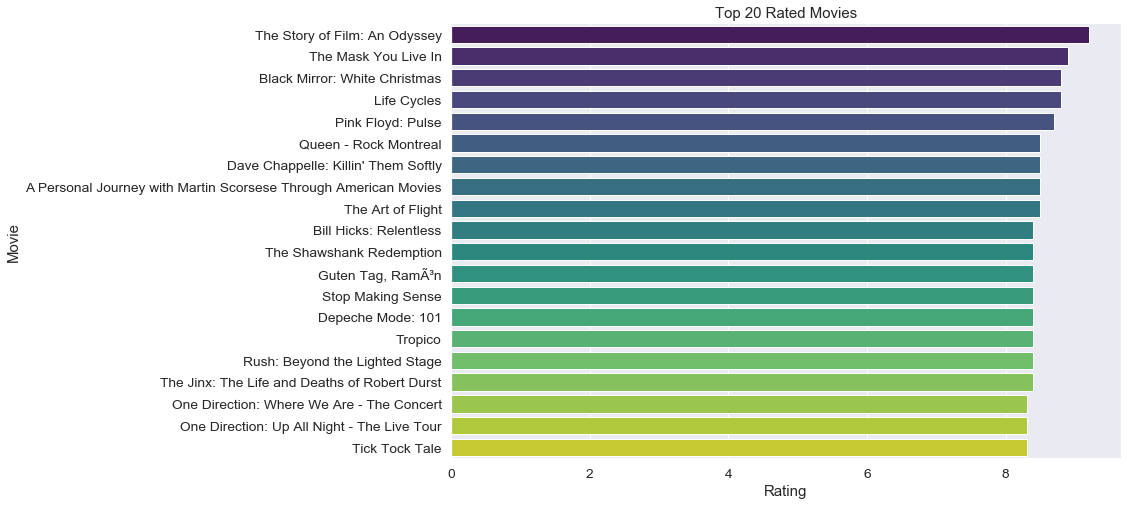

In [27]:
# visualizing the top 20 rated movies
plt.figure(figsize=(12,8))
sns.barplot(data=top20_rating, x='rating', y='title', palette="viridis")
plt.title("Top 20 Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie")
plt.show()

***Top 5 Rated Movies:***<br>
***1)The Story of Film: An Odyssey with Rating 9.2 .*** <br>
***2)The Mask You Live In with Rating 8.9 .*** <br>
***3)Black Mirror: White Christmas with Rating 8.8 .*** <br>
***4)Life Cycles with Rating 8.8 .*** <br>
***5)Pink Floyd: Pulse with Rating 8.7 .***

## 2) What Kinds of properties are associated with Top 20 Rated Movies?

In [28]:
# properties are associated with top 5 rated movies
top20_rating.head()

,id,title,director,genre,runtime,budget,revenue,profit,rating,popularity,release_date,year
3894,125336,The Story of Film: An Odyssey,Mark Cousins,Documentary,900.0,1.471114e+07,4.006558e+07,2.535444e+07,9.2,0.006925,2011-09-03,2011
538,224972,The Mask You Live In,Jennifer Siebel Newsom,Documentary,88.0,1.471114e+07,4.006558e+07,2.535444e+07,8.9,0.114264,2015-01-01,2015
1200,374430,Black Mirror: White Christmas,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,74.0,1.471114e+07,4.006558e+07,2.535444e+07,8.8,0.129531,2014-12-16,2014
2269,51299,Life Cycles,Derek Frankowski,Documentary,47.0,1.471114e+07,4.006558e+07,2.535444e+07,8.8,0.222293,2010-10-02,2010
6911,24970,Pink Floyd: Pulse,David Mallet,Music,145.0,1.471114e+07,4.006558e+07,2.535444e+07,8.7,0.212010,2006-07-09,2006


In [29]:
# descriptive statistics associated to top 20 rated movies
top20_rating.describe()

,runtime,budget,revenue,profit,rating,popularity,year
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000
mean,142.000000,1.401447e+07,3.772504e+07,2.371057e+07,8.525000,0.505593,2004.450000
std,187.553501,4.550494e+06,8.140107e+06,7.293675e+06,0.235919,1.576753,11.166091
min,6.000000,1.200000e+06,4.978922e+06,3.341469e+06,8.300000,0.004853,1981.000000
25%,70.000000,1.471114e+07,4.006558e+07,2.535444e+07,8.400000,0.094095,1994.750000
50%,97.000000,1.471114e+07,4.006558e+07,2.535444e+07,8.400000,0.159614,2010.000000
75%,139.000000,1.471114e+07,4.006558e+07,2.535444e+07,8.550000,0.231870,2013.000000
max,900.000000,2.500000e+07,4.006558e+07,3.606558e+07,9.200000,7.192039,2015.000000


### 3)Top 20 Profitable Movies?

In [30]:
# sort data descending by 'profit' values and slicing the highest 20 movies
top20_profit = movie_df.sort_values('profit', ascending=False)[:20]

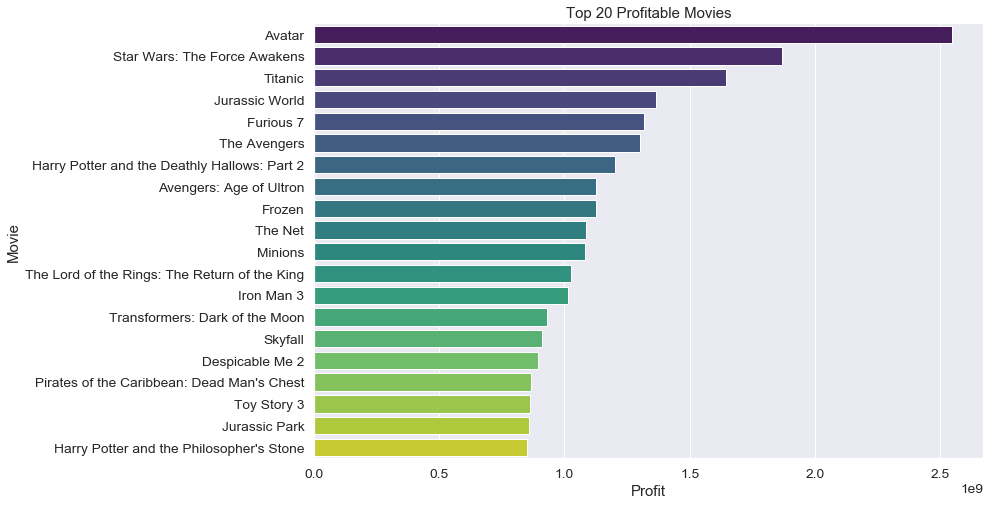

In [31]:
# visualizing the highest 20 profit movies
plt.figure(figsize=(12,8))
sns.barplot(x='profit', y='title', data=top20_profit, palette="viridis")
plt.title("Top 20 Profitable Movies")
plt.xlabel("Profit")
plt.ylabel("Movie")
plt.show()

***The Top 5 Profitable Movies:*** <br>
***1) Avatar with profit 2.544506 Billion.*** <br>
***2) Star Wars: The Force Awakens with profit 1.868178 Billion.*** <br>
***3) Titanic with profit 1.645034 Billion.*** <br>
***4) Jurassic World with profit 1.363529 Billion.*** <br>
***5) Furious 7 with profit 1.316249 Billion.***


### 4)What Kinds of properties are associated with Top 20 Profitable Movies?

In [32]:
# properties are associated with top 5 profitable movies
top20_profit.head()

,id,title,director,genre,runtime,budget,revenue,profit,rating,popularity,release_date,year
1386,19995,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,162.0,237000000.0,2.781506e+09,2.544506e+09,7.1,9.432768,2009-12-10,2009
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,136.0,200000000.0,2.068178e+09,1.868178e+09,7.5,11.173104,2015-12-15,2015
5231,597,Titanic,James Cameron,Drama|Romance|Thriller,194.0,200000000.0,1.845034e+09,1.645034e+09,7.3,4.355219,1997-11-18,1997
0,135397,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,124.0,150000000.0,1.513529e+09,1.363529e+09,6.5,32.985763,2015-06-09,2015
4,168259,Furious 7,James Wan,Action|Crime|Thriller,137.0,190000000.0,1.506249e+09,1.316249e+09,7.3,9.335014,2015-04-01,2015


In [33]:
# descriptive statistics associated to top 20 profitable movies
top20_profit.describe()

,runtime,budget,revenue,profit,rating,popularity,year
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000
mean,136.650000,1.600500e+08,1.353347e+09,1.193297e+09,7.065000,7.036718,2008.700000
std,28.727898,6.710751e+07,4.476855e+08,4.180590e+08,0.560334,6.705487,7.101519
min,91.000000,2.200000e+07,9.201000e+08,8.514756e+08,5.600000,0.760503,1993.000000
25%,121.500000,1.172500e+08,1.096125e+09,9.051112e+08,6.800000,4.136691,2005.250000
50%,136.500000,1.925000e+08,1.186085e+09,1.083505e+09,7.250000,5.828121,2011.500000
75%,151.250000,2.000000e+08,1.508069e+09,1.303731e+09,7.425000,7.733681,2013.500000
max,201.000000,2.800000e+08,2.781506e+09,2.544506e+09,7.900000,32.985763,2015.000000


### 5)Top 10 Directors by Number of Released Movies?

In [34]:
# count the number of released movies for each director, and sort the data descending by number of movies
# slicing the top 10 directors
directors = movie_df['director'].value_counts().sort_values(ascending=False)[:10]

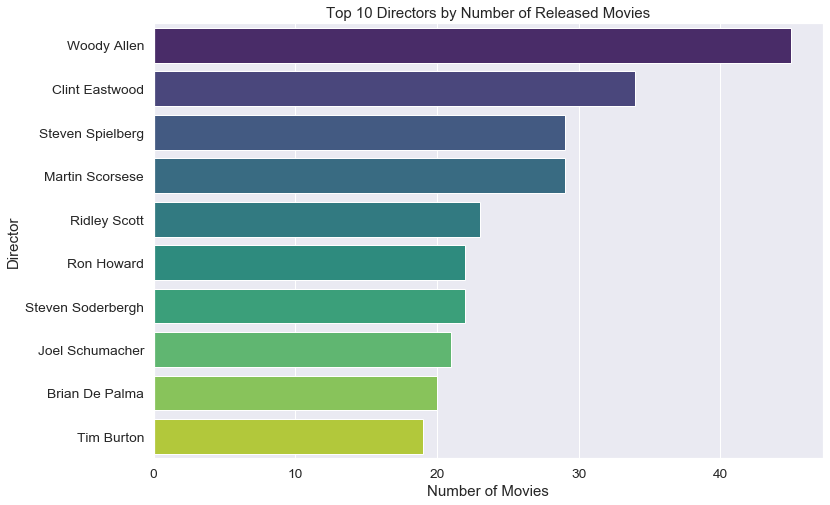

In [35]:
# visualizing the top 10 directors
plt.figure(figsize=(12,8))
sns.barplot(x=directors.values, y=directors.index, palette="viridis")
plt.title("Top 10 Directors by Number of Released Movies")
plt.xlabel("Number of Movies")
plt.ylabel('Director')
plt.show()

***Top 5 Directors:***<br>
***1) Woody Allen directed 45 Movies.***<br>
***2) Clint Eastwood directed 34 Movies.***<br>
***3) Steven Spielberg directed 29 Movies.***<br>
***4) Martin Scorsese directed 29 Movies.***<br>
***5) Ridley Scott directed 23 Movies.***

### 6)What is The Distribution of Runtime?

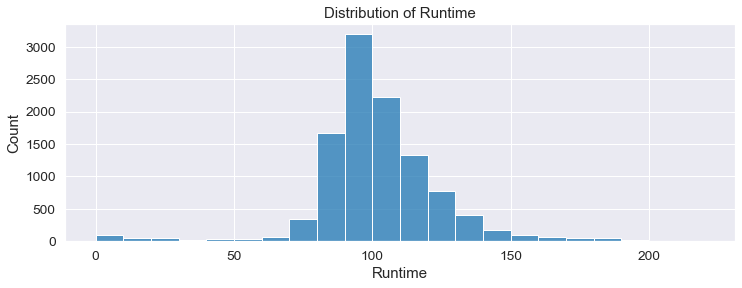

In [36]:
# visualizing the distribution of runtime values.
plt.figure(figsize=(12,4))
sns.histplot(x=movie_df['runtime'], binrange=(0,220), binwidth=10)
plt.title("Distribution of Runtime")
plt.xlabel("Runtime")
plt.show()

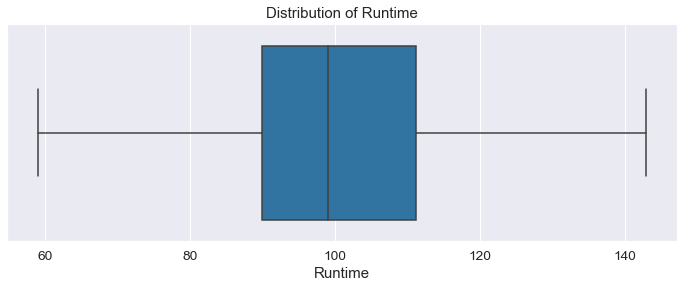

In [37]:
# visualizing the distribution of runtime values without outliers.
plt.figure(figsize=(12,4))
sns.boxplot(x=movie_df['runtime'], showfliers=False)
plt.title("Distribution of Runtime")
plt.xlabel("Runtime")
plt.show()

* ***Minimum Runtime is 58 minutes.***<br>
* ***Maximum Runtime is 142 minutes.***<br>
* ***50% of Movies have Runtime between 90 and 111 minutes.***<br>

### 7)What is The Correlations Between Movies Properties?

In [38]:
# calculate the correlation between movies properties
corr_df = movie_df[['runtime', 'budget', 'revenue', 'profit', 'rating', 'popularity']].corr()

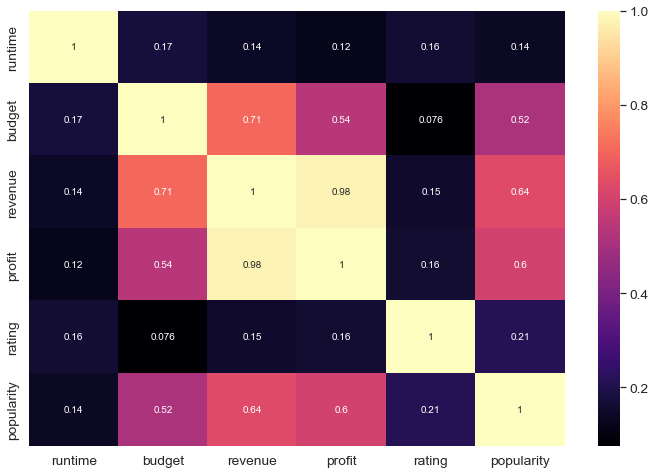

In [39]:
# visualize the correlation between movies properties
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_df, annot=True, cmap="magma")
plt.show()

* ***Correlation between Rating and Popularity is 0.21, it is a Weak Positive Correlation.*** <br>
* ***Correlation between Rating and Runtime is 0.16, it is a Weak Positive Correlation.*** <br>
* ***Correlation between Profit and Runtime is 0.12, it is a Weak Positive Correlation.*** <br>

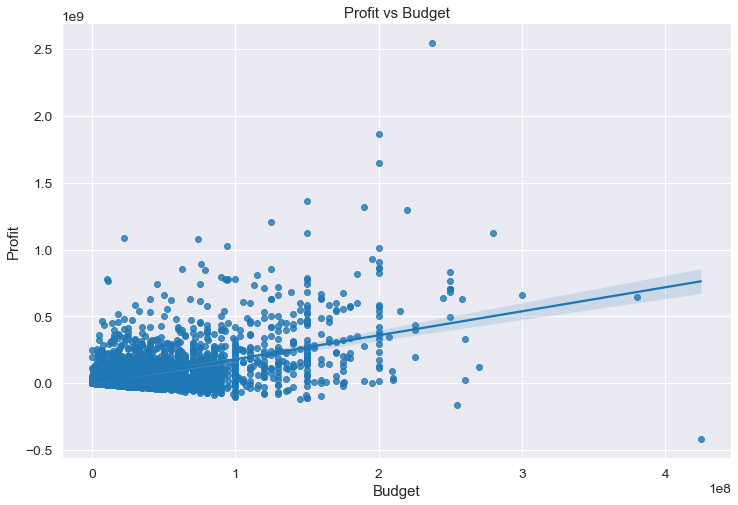

In [40]:
# visualize the correlation between Budget and Profit
plt.figure(figsize=(12,8))
sns.regplot(x='budget', y='profit', data=movie_df)
plt.title("Profit vs Budget")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.show()

* ***Correlation between Profit and Budget is 0.54, it is a Moderate Positive Correlation.***

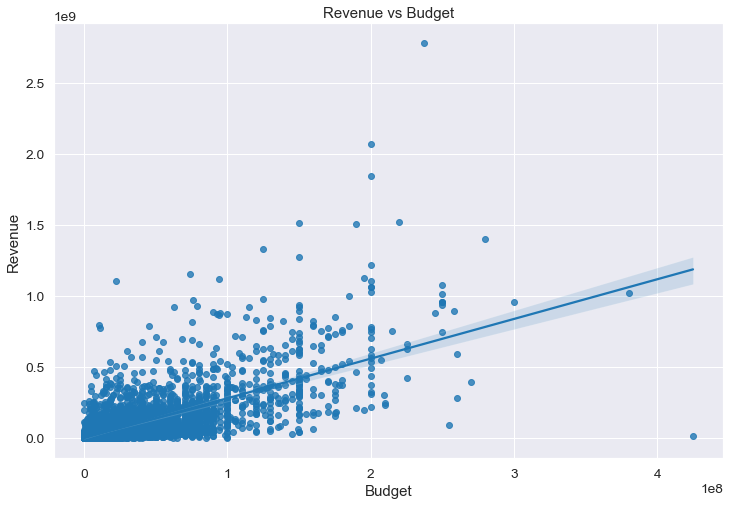

In [41]:
# visualize the correlation between Budget and Revenue
plt.figure(figsize=(12,8))
sns.regplot(x='budget', y='revenue', data=movie_df)
plt.title("Revenue vs Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

* ***Correlation between Revenue and Budget is 0.71, it is a Moderate Positive Correlation.***

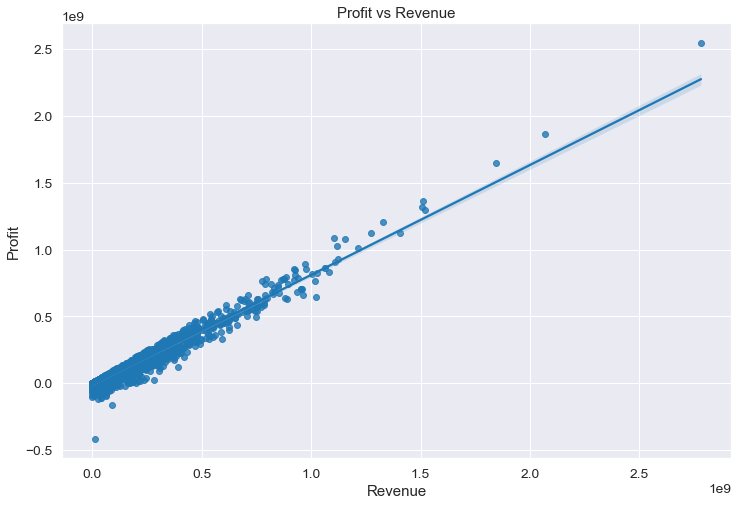

In [42]:
# visualize the correlation between Revenue and Profit
plt.figure(figsize=(12,8))
sns.regplot(x='revenue', y='profit', data=movie_df)
plt.title("Profit vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()

* ***Correlation between Profit and Revenue is 0.98, it is a Strong Positive Correlation.***

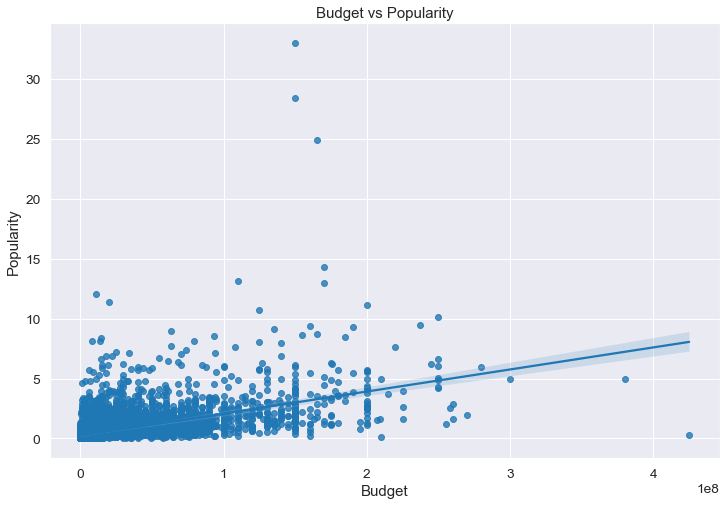

In [43]:
# visualize the correlation between Popularity and Budget
plt.figure(figsize=(12,8))
sns.regplot(x='budget', y='popularity', data=movie_df)
plt.title("Budget vs Popularity")
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.show()

* ***Correlation between Popularity and Budget is 0.52, it is a Moderate Positive Correlation.***

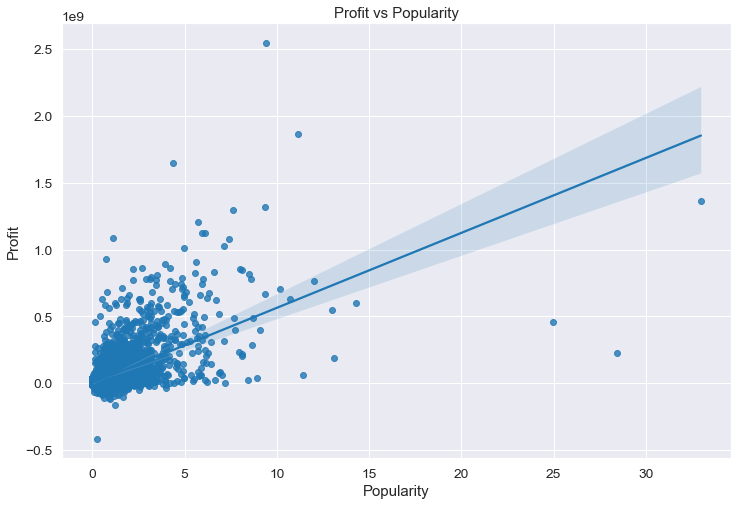

In [44]:
# visualize the correlation between Popularity and Profit
plt.figure(figsize=(12,8))
sns.regplot(x='popularity', y='profit', data=movie_df)
plt.title("Profit vs Popularity")
plt.xlabel("Popularity")
plt.ylabel("Profit")
plt.show()

* ***Correlation between Profit and Popularity is 0.6, it is a Moderate Positive Correlation.***

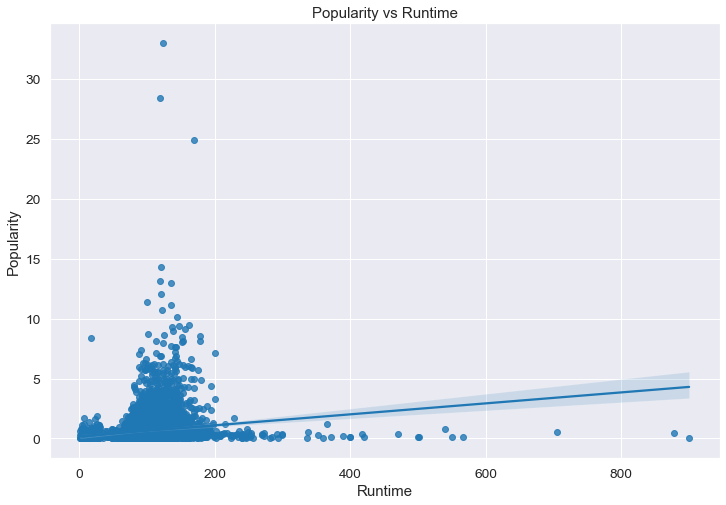

In [45]:
# visualize the correlation between Popularity and Runtime
plt.figure(figsize=(12,8))
sns.regplot(x='runtime', y='popularity', data=movie_df)
plt.title("Popularity vs Runtime")
plt.xlabel("Runtime")
plt.ylabel("Popularity")
plt.show()

* ***Correlation between Popularity and Runtime is 0.14, it is a Weak Positive Correlation.***

### 8)How Movies Profit changed over Years?

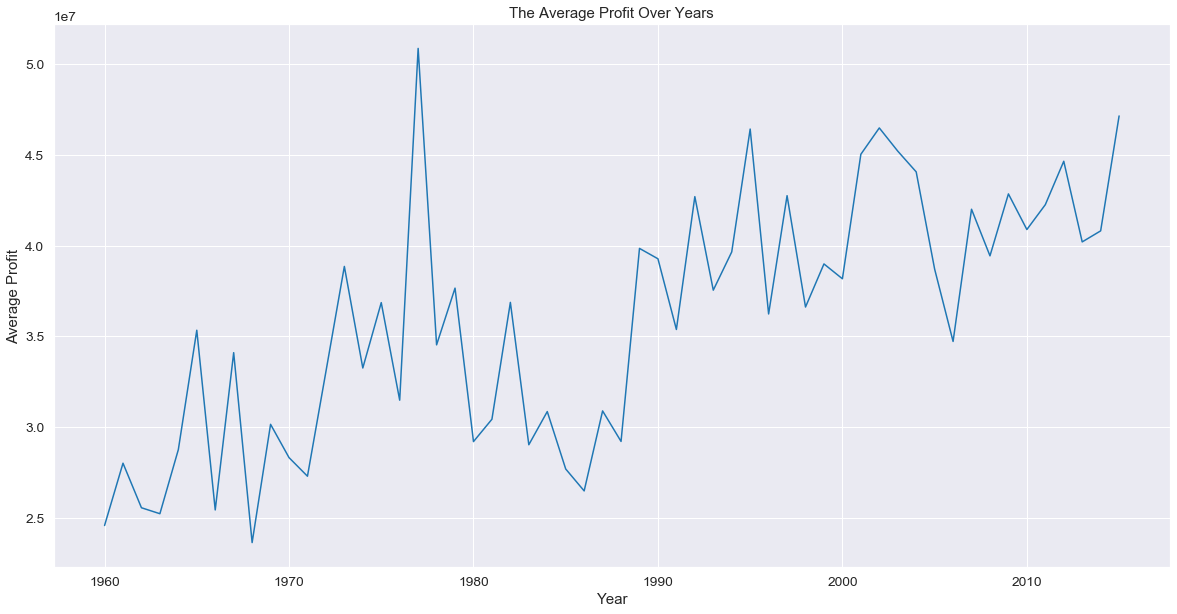

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='profit', data=movie_df, ci=None)
plt.title("The Average Profit Over Years")
plt.xlabel("Year")
plt.ylabel("Average Profit")
plt.show()

* ***The Average Profit from 1960 to 1976 is lower than 40 million.*** <br>
* ***Minimum Average Profit is 24 million in 1968.*** <br>
* ***Maximum Average Profit is 51 million in 1977.*** <br>
* ***The Average Profit from 1989 to 2015 is greater than 35 million.*** <br>


### Fix Genre Values

In [47]:
def explode_values(df,col):
    """ This Function Take dataframe 'df' and column 'col' with multiple values and return exploded dataframe"""
    # split column values into lists
    df[col] = df[col].str.split('|')
    # return exploded dataframe
    return df.explode(col, ignore_index=True)
    

In [48]:
# explode 'genre' values 
movie_df = explode_values(movie_df, 'genre')

In [49]:
# check 'genre' values
print("Genre Values became ", movie_df.genre.unique())

Genre Values became  ['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


### 9)What is The Average Genre Profit?

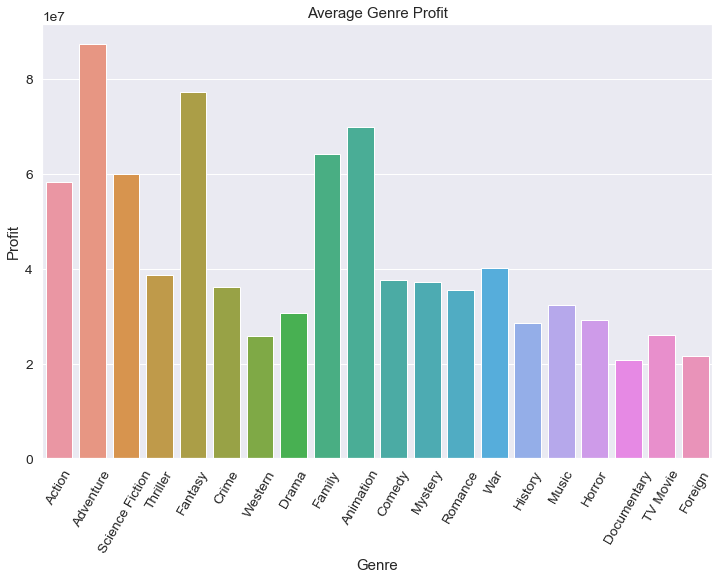

In [50]:
# visualize the average genre profit
plt.figure(figsize=(12,8))
sns.barplot(x='genre', y='profit', data=movie_df, ci=None)
plt.xticks(rotation=60)
plt.title("Average Genre Profit")
plt.xlabel("Genre")
plt.ylabel("Profit")
plt.show()

* ***Maximum Average Profit is 87.25896 million for Adventure Genre.***
* ***Minimum Average Profit is 20.64230 million for Documentary Genre.***

### 10)What is The Distribution of Genre Profit?

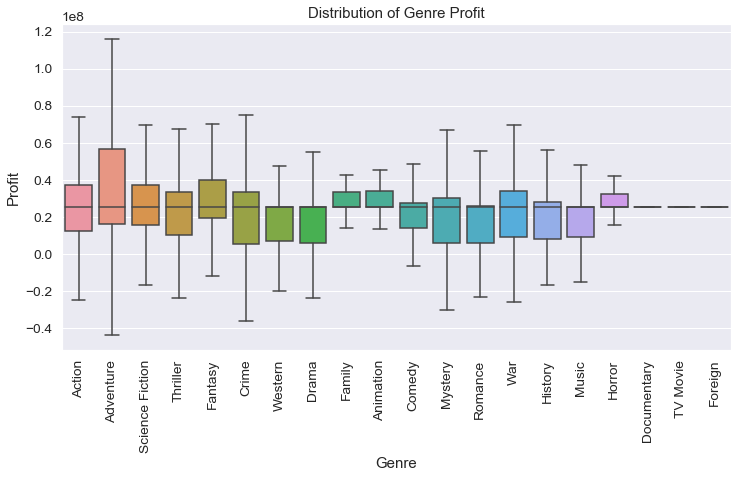

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='profit', data=movie_df, showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Genre Profit")
plt.xlabel("Genre")
plt.ylabel("Profit")
plt.show()

* ***Adventure and Action Genres have the maximum Profit.***<br>
* ***Adventure Genre has the minimum Profit.***<br>

### 11)How average Genre Profit changed over Years?

In [56]:
top_genre_profit = movie_df[movie_df.genre.isin([ 'Adventure', 'Science Fiction', 'Fantasy', 'Action'])]

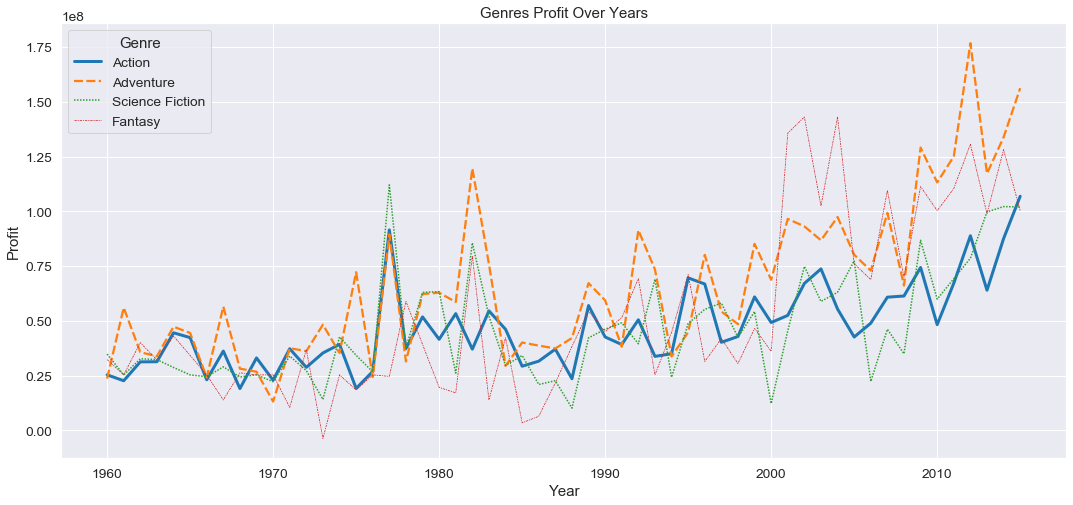

In [57]:
plt.figure(figsize=(18,8))
sns.lineplot(x='year', y='profit', data=top_genre_profit, hue='genre', style='genre', size='genre', ci=None)
plt.legend(title='Genre')
plt.title("Genres Profit Over Years")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.show()

<a id='conclusions'></a>
## Conclusions

***1)Top 5 Rated Movies are The Story of Film: An Odyssey, The Mask You Live In, Black Mirror: White Christmas, Life Cycles, and Pink Floyd: Pulse.*** <br>

***2)Top 5 Profitable Movies are Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, and Furious 7 .*** <br>

***3)Top 5 Directors with the number of released movies are Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese, and Ridley Scott.*** <br>

***4)Movie Duration must be between 58 and 142 minutes.*** <br>

***5) 50% of the Movies' Duration is between 90 and 111 minutes.*** <br>

***6) Movies' Revenue, Profit, and Popularity are increased according to their Budget increase.*** <br>

***7)The Average Movies Profit is increased over time.*** <br>

***8)The Profitable Movies Genres are Adventure, Action, and Fantasy.*** 

### Limitations:

* ***This Analysis isn't completely error-free, but it shows us the properties of profitable movies.*** <br>
* ***During my analysis, I split genre values that separated by "|" into many rows for the exploration phase, this increases the analysis time.*** <br>
* ***There is no currency unit for the budget, revenue, and profit columns so they may be in different currencies for different countries.***